In [1]:
#@title Connect to gdrive
import google.colab.drive
google.colab.drive.mount('/content/drive/')

Mounted at /content/drive/


# Comparison community structures and genre associations across the three countries.

In [2]:
import os
import pandas as pd
import json
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

#load the CSV data for Romania, Croatia, and Hungary
romania_data = pd.read_csv("/content/drive/MyDrive/network_science/group_project_deezer/node_data_RO_v2.csv")
croatia_data = pd.read_csv("/content/drive/MyDrive/network_science/group_project_deezer/node_data_HR_v2.csv")
hungary_data = pd.read_csv("/content/drive/MyDrive/network_science/group_project_deezer/node_data_HU_v2.csv")

#country column
romania_data['Country'] = 'Romania'
croatia_data['Country'] = 'Croatia'
hungary_data['Country'] = 'Hungary'

#combining all data
all_data = pd.concat([romania_data, croatia_data, hungary_data], ignore_index=True)

# displaying head for each country
print("Romania Data (Head):")
print(all_data[all_data['Country'] == 'Romania'].head())

print("\nCroatia Data (Head):")
print(all_data[all_data['Country'] == 'Croatia'].head())

print("\nHungary Data (Head):")
print(all_data[all_data['Country'] == 'Hungary'].head())



Romania Data (Head):
   community_id  community_size  degree_centrality  betweenness_centrality  \
0             0             681           0.002941                0.005874   
1             0             681           0.002941                0.008798   
2             0             681           0.002941                0.005874   
3             0             681           0.001471                0.000000   
4             0             681           0.004412                0.001102   

   closeness_centrality  node_id  \
0              0.097449    12294   
1              0.107885     8199   
2              0.170597    32776   
3              0.191441     2054   
4              0.233516    30729   

                                              genres  Country  
0            ['Alternative', 'Metal', 'Pop', 'Rock']  Romania  
1  ['Films/Games', 'Indie Rock', 'International P...  Romania  
2  ['Hard Rock', 'Indie Rock/Rock pop', 'Pop', 'R...  Romania  
3                            ['Altern

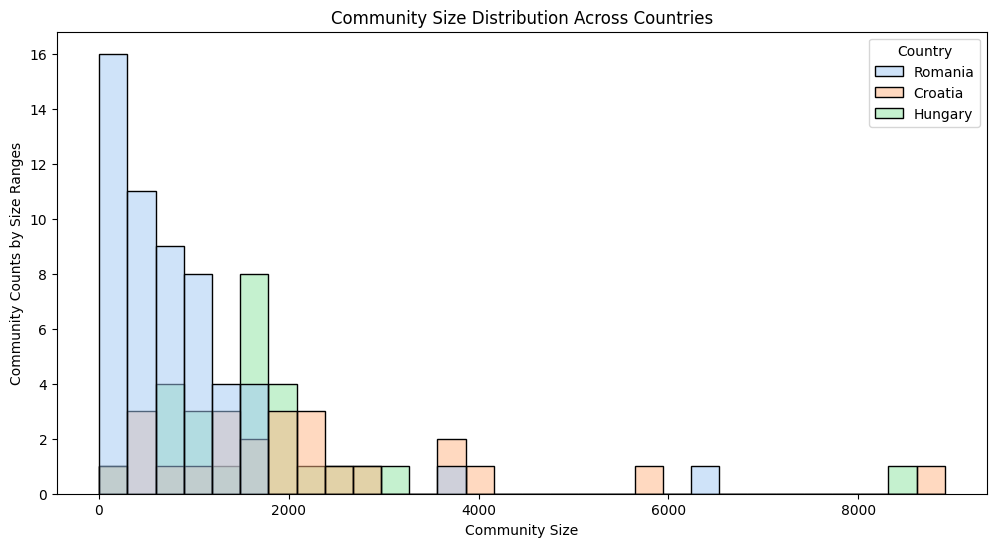

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

#communities based on community id, community size, and Country
unique_communities = all_data[['community_id', 'community_size', 'Country']].drop_duplicates()

plt.figure(figsize=(12, 6))
sns.histplot(
    data=unique_communities,
    x='community_size',
    hue='Country',
    bins=30,
    kde=False,
    palette='pastel',
    element='bars',
)

plt.title('Community Size Distribution Across Countries')
plt.xlabel('Community Size')
plt.ylabel('Community Counts by Size Ranges')
plt.show()



## Romania:
* Dominance of smaller community sizes and high modularity indicates a fragmented network where user preferences are likely centered around niche music genres.
* This suggest a diverse musical landscape, with users not clustering strongly around a few central genres.

## Croatia:
* Croatia has fewer very small communities, and the distribution shows a larger number of medium sized communities.
* This indicates stronger connections and higher density within the subgraphs, meaning users are more interconnected and likely to engage around shared musical interests.


## Hungary:
* A balanced distribution with a slight skew towards medium-sized communities suggests that Hungary has a mix of both niche and integrated communities.
* This represents moderate modularity and average density, indicating that while some users are attracted to niche genres, others form integrated clusters around broader or more popular genres.

Average Community Size by Country:
   Country  community_size
0  Croatia     3867.305682
1  Hungary     3019.666540
2  Romania     2064.495416


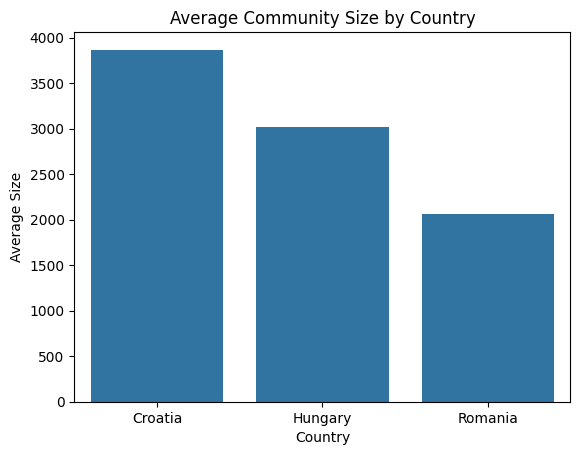

In [5]:
avg_community_size = all_data.groupby('Country')['community_size'].mean().reset_index()
print("Average Community Size by Country:")
print(avg_community_size)

sns.barplot(data=avg_community_size, x='Country', y='community_size')
plt.title('Average Community Size by Country')
plt.ylabel('Average Size')
plt.xlabel('Country')
plt.show()


## Croatia:
* Croatia has the largest average community size, which aligns with the previous observation about more medium sized communities.
* This suggests a more cohesive and interconnected user base,that indicating shared musical interests or popular genres that bring users together in larger groups.

## Hungary:
* Hungary shows a balanced structure, supporting the earlier observation of a mix of specialized and broader communities.
* This suggests that while users form medium sized groups, there is still significant diversity in preferences, resulting in both localized and interconnected clusters .

## Romania:
* Romania has the smallest average community size, which indicates a fragmented network structure with many smaller, localized communities.
* This reflects a diverse musical landscape, where user preferences are more individualized and less centered around shared genres.

<ipython-input-6-997ec1878208>:11: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



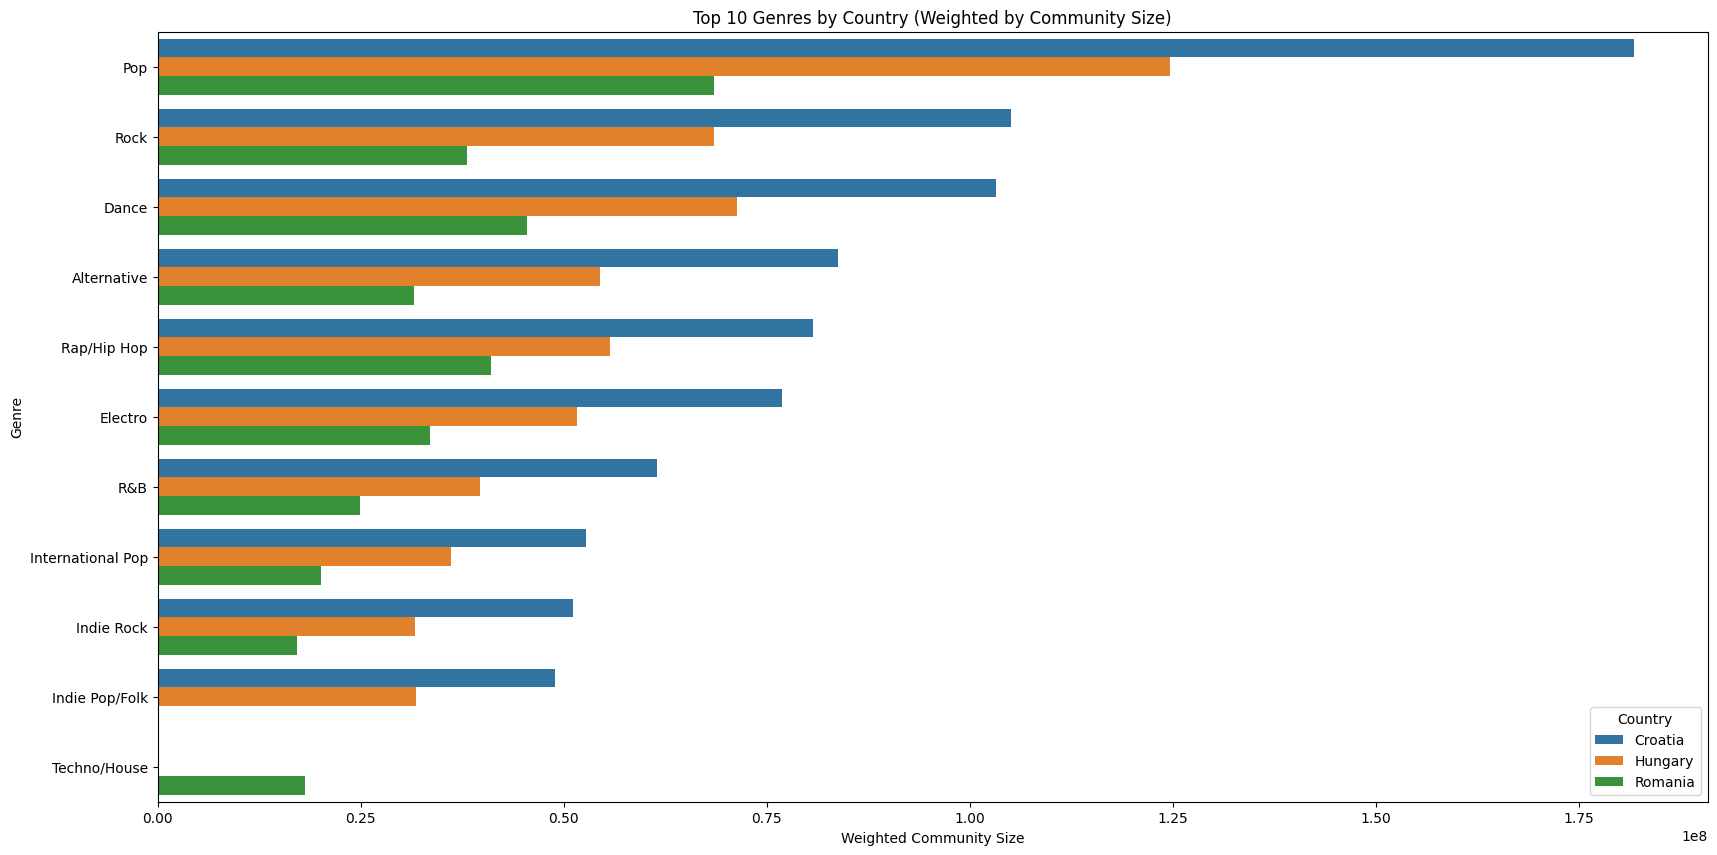

In [6]:
all_data['genres'] = all_data['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

exploded_data = all_data.explode('genres')

#weighted analysis
weighted_genres = exploded_data.groupby(['Country', 'genres'])['community_size'].sum().reset_index(name='Weighted Count')

weighted_top_genres = (
    weighted_genres.groupby('Country')
    .apply(lambda x: x.nlargest(10, 'Weighted Count'))
    .reset_index(drop=True)
)
#construct barplot
plt.figure(figsize=(20, 10))
sns.barplot(
    x='Weighted Count',
    y='genres',
    hue='Country',
    data=weighted_top_genres.sort_values(by='Weighted Count', ascending=False)
)
plt.title('Top 10 Genres by Country (Weighted by Community Size)')
plt.xlabel('Weighted Community Size')
plt.ylabel('Genre')
plt.legend(title='Country')
plt.show()



## Croatia:

* Pop stands out as the overwhelmingly dominant genre in Croatia, far surpassing other genres in weighted community size. This highlights its unifying role across the largest communities in the country.
* Secondary genres like Rock and Dance also have significant weighted community sizes, suggesting their appeal across a wide range of users but still trailing behind Pop.
* Rap/Hip Hop and Alternative show moderate representation, indicating a mix of mainstream and some diversity within Croatia’s music preferences.

## Hungary:
* Hungary’s weighted distribution shows Pop leading but with smaller dominance compared to Croatia, indicating a more balanced preference among genres.
* Dance is the second most popular genre, reflecting Hungary’s preference for energetic music.
* Rock holds the third position, unlike Croatia, where it is more dominant as the second genre.



## Romania:
* Romania exhibits smaller weighted community sizes overall, consistent with its fragmented network structure.
* Pop remains the most popular genre in Romania, consistent with the dominance of Pop across all countries. However, its influence is smaller compared to Croatia and Hungary.
* Dance emerges as the second most popular genre, similar to Hungary.
* Rap/Hip Hop ranks just behind Pop and Dance in Romania, highlighting a cultural preference for rhythmic and modern music styles.

<ipython-input-7-ac93780f566c>:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



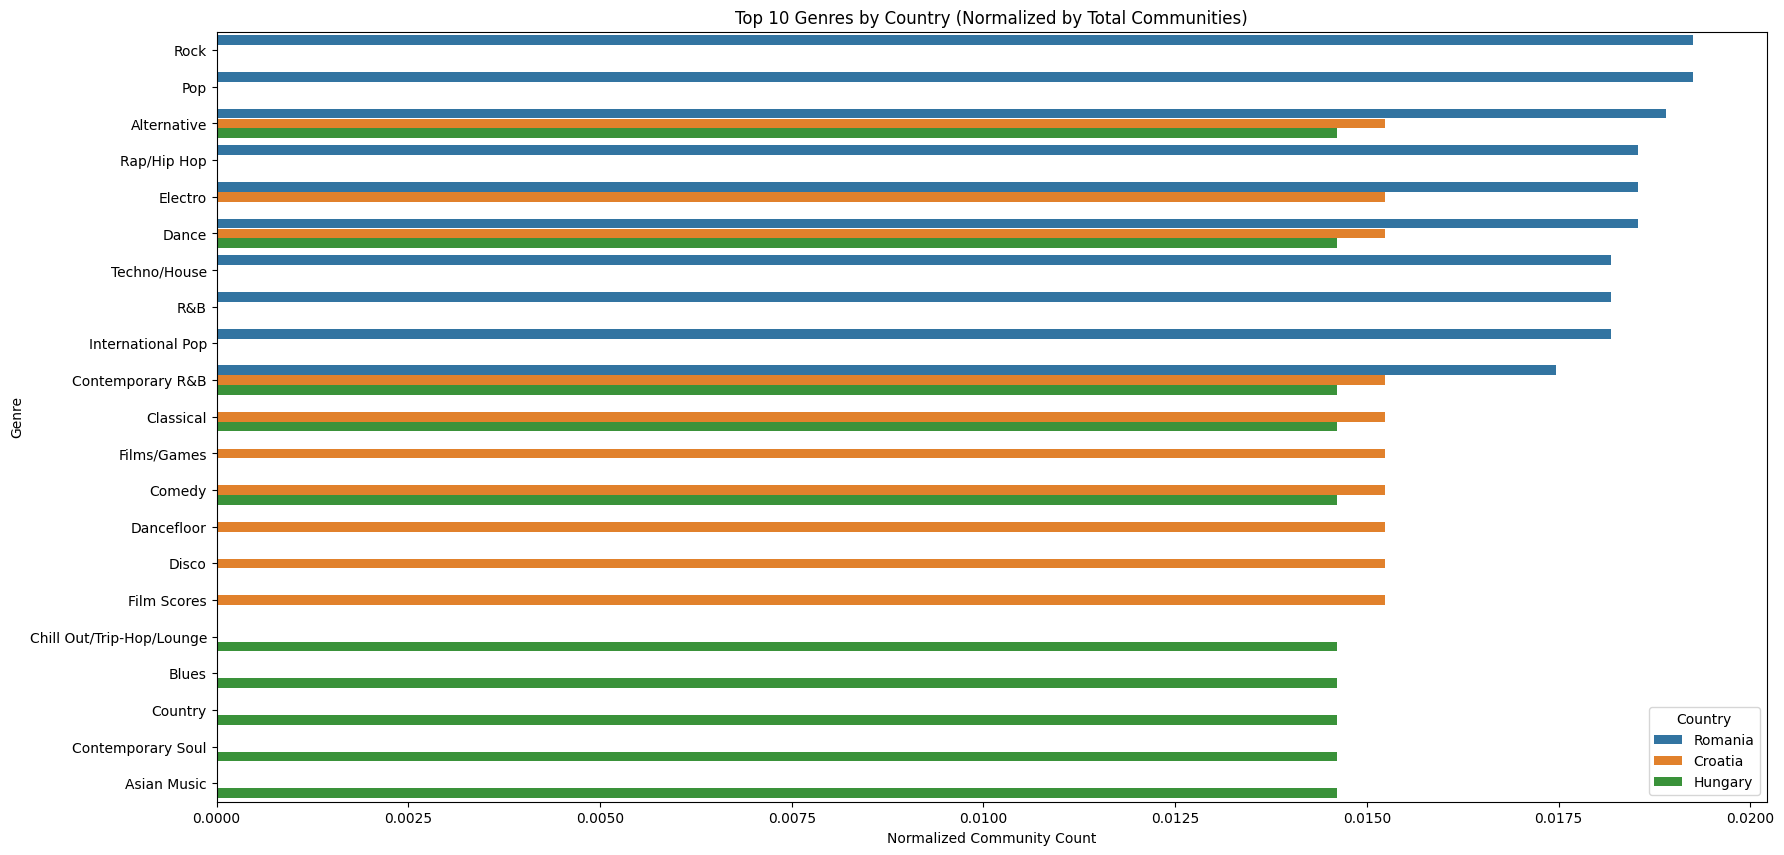

In [7]:
# normalized community counts and analysis
normalized_genres = exploded_data.groupby(['Country', 'genres'])['community_id'].nunique().reset_index(name='Community Count')
normalized_genres['Normalized Count'] = normalized_genres.groupby('Country')['Community Count'].transform(lambda x: x / x.sum())

normalized_top_genres = (
    normalized_genres.groupby('Country')
    .apply(lambda x: x.nlargest(10, 'Normalized Count'))
    .reset_index(drop=True)
)


plt.figure(figsize=(20,10))
sns.barplot(
    x='Normalized Count',
    y='genres',
    hue='Country',
    data=normalized_top_genres.sort_values(by='Normalized Count', ascending=False)


)
plt.title('Top 10 Genres by Country (Normalized by Total Communities)')
plt.xlabel('Normalized Community Count')
plt.ylabel('Genre')
plt.legend(title='Country')
plt.show()

In [24]:
print(normalized_top_genres)

    Country                     genres  Community Count  Normalized Count
0   Croatia                Alternative               24          0.015238
1   Croatia                  Classical               24          0.015238
2   Croatia                     Comedy               24          0.015238
3   Croatia           Contemporary R&B               24          0.015238
4   Croatia                      Dance               24          0.015238
5   Croatia                 Dancefloor               24          0.015238
6   Croatia                      Disco               24          0.015238
7   Croatia                    Electro               24          0.015238
8   Croatia                Film Scores               24          0.015238
9   Croatia                Films/Games               24          0.015238
10  Hungary                Alternative               26          0.014615
11  Hungary                Asian Music               26          0.014615
12  Hungary                      Blues

## Croatia:
* The normalized counts for all listed genres indicating equal representation of these genres within Croatia’s communities.
* Dance, Electro, Alternative, and Contemporary R&B are present but are not  dominant, suggesting a balanced and consistent presence of these genres in the network.
* The inclusion of niche genres like Classical, Film Scores, and Disco reflects a broad but less varied distribution, where no genre stands out significantly.

## Hungary:
* Hungary’s normalized counts are equal for top 10 genres and they are slightly lower than Croatia’s. This suggests that the communities are more distributed, with no genre overly dominant.
Genres like Dance, Alternative, and Blues reflect Hungary’s diversity in musical preferences.
Niche genres such as Asian Music, Chill Out/Trip-Hop/Lounge, and Country showcase Hungary’s openness to a wide range of styles.


## Romania:
* Pop and Rock dominate in normalized counts, reflecting their significant representation in Romania’s communities. This suggests a shared dominance of mainstream genres.
* Alternative Dance, Electro, and Rap/Hip Hop rank just below, indicating a strong secondary focus on rhythmic and modern genres.
* Techno/House and Contemporary R&B have slightly lower but still notable counts, showcasing Romania’s affinity for electronic and soulful music styles.




Average Centrality Measures by Country:
   Country  degree_centrality  betweenness_centrality
0  Croatia           0.006475                0.001139
1  Hungary           0.003732                0.002136
2  Romania           0.005293                0.005125


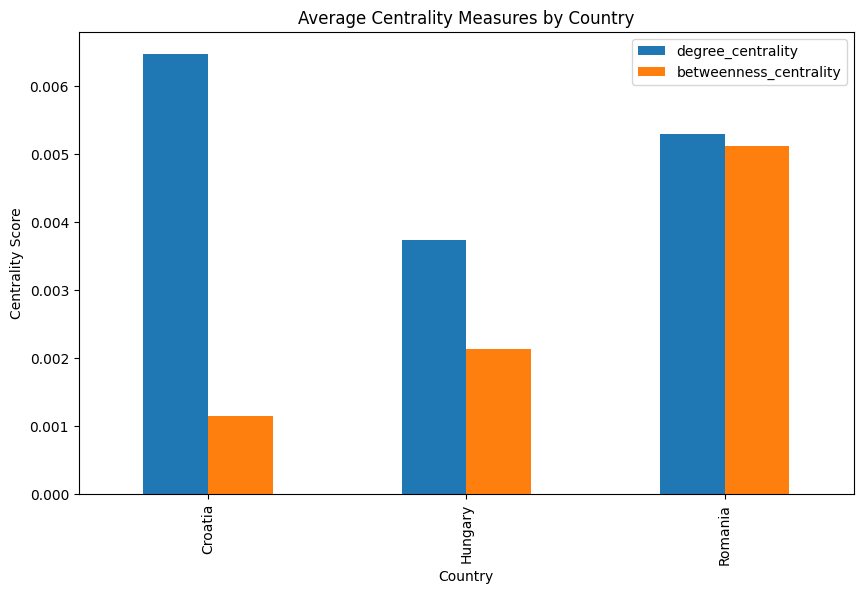

In [8]:
#Average centrality by country(degree and betweennes)
avg_centrality = all_data.groupby('Country')[['degree_centrality', 'betweenness_centrality']].mean().reset_index()
print("Average Centrality Measures by Country:")
print(avg_centrality)

avg_centrality.plot(x='Country', kind='bar', figsize=(10, 6), title='Average Centrality Measures by Country')
plt.ylabel('Centrality Score')
plt.xlabel('Country')
plt.show()


## Croatia:

* Communities in Croatia are highly connected but lack intermediaries, indicated by low Betweenness Centrality.

## Hungary:

* Communities are moderately connected and intermediaries play a more significant role, reflecting a balanced and distributed network.

## Romania:

* Romania exhibits the highest betweenness centrality and moderate degree centrality, indicative of a fragmented network structure.